In [53]:
import pandas as pd
from matplotlib import pyplot as plt


In [54]:
pwd

'/Users/kimdasol/Desktop/coding_test/1day_1coding/skcnc'

In [55]:
# 데이터불러오기
df = pd.read_csv("PM10_seoul.csv")
df.head()

,date,PM-10
0,2022-12-08:24,22.0
1,2022-12-08:23,22.0
2,2022-12-08:22,25.0
3,2022-12-08:21,23.0
4,2022-12-08:20,20.0


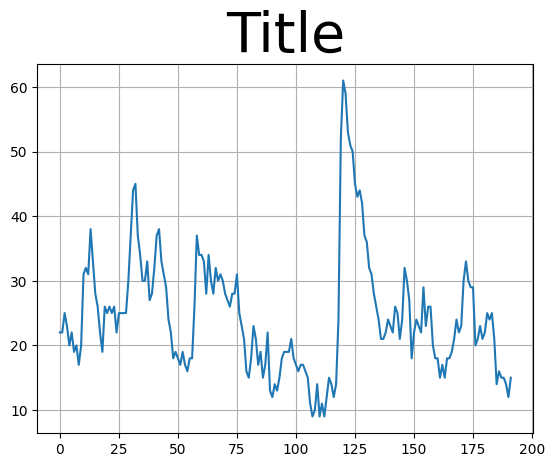

In [56]:
# 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화 하세요.
# 데이터 시각화
plt.plot(range(len(df)), df["PM-10"])
plt.title ("Title", size = 40)
plt.grid()
plt.show()

In [57]:
# (2) 시간대별 평균 미세먼지 농도를 계산하세요. 즉  t시(t=1,2,3,4,...,24)
df["time"]=df["date"].str.split(":",expand= True).iloc[:,1]
df.head()

,date,PM-10,time
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20


In [58]:
# 데이터 추출 후 평균값 
df1 = df.groupby("time").mean(["PM-10"])
df1.head()


,PM-10
time,
01,25.875
02,22.000
03,21.000
04,21.000
05,21.375


In [59]:
# 시점 t의 미세먼지 농도를 시점 t-1,t-2,t-3,t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하세요. 
# 예를들어, 8일 24시의 미세먼지 농도를 8일 20-23시의 농도를 예측할 수 있도록 구성합니다.


In [69]:
for k in range(1,5):
    df["PM-10_"+str(k)] = df["PM-10"].shift(-k)

df.dropna(inplace= True) # 결측치 제거
df = df.drop(["date","time"], axis=1) #모델링에 필요하지 않은 열 제거


In [75]:
df.head()

,PM-10,PM-10_1,PM-10_2,PM-10_3,PM-10_4
0,22.0,22.0,25.0,23.0,20.0
1,22.0,25.0,23.0,20.0,22.0
2,25.0,23.0,20.0,22.0,19.0
3,23.0,20.0,22.0,19.0,20.0
4,20.0,22.0,19.0,20.0,17.0


In [76]:
# (4)PM-10칼럼을 기준으로 특징과 라벨을 분리하여 학습한다.
X = df.drop("PM-10",axis=1)
y = df["PM-10"]

In [77]:
X.head()

,PM-10_1,PM-10_2,PM-10_3,PM-10_4
0,22.0,25.0,23.0,20.0
1,25.0,23.0,20.0,22.0
2,23.0,20.0,22.0,19.0
3,20.0,22.0,19.0,20.0
4,22.0,19.0,20.0,17.0


In [78]:
y.head()

0    22.0
1    22.0
2    25.0
3    23.0
4    20.0
Name: PM-10, dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)